In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

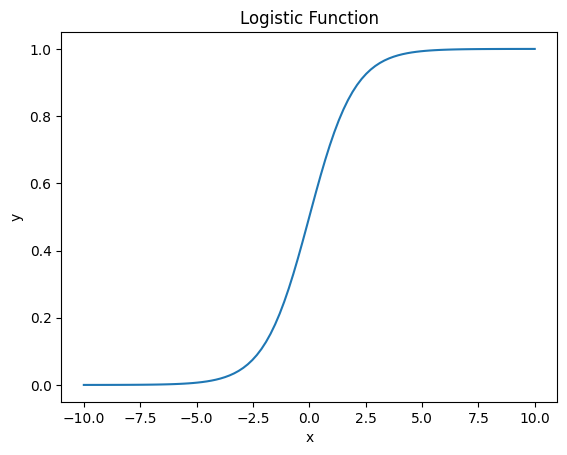

In [4]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 100)
y = logistic_function(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Function')
plt.show()


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.isnull().sum()


In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X_train)

# Standardize the data
X_train_stand= scaler.transform(X_train)
X_test_stand= scaler.transform(X_test)


In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_stand, y_train)



In [ ]:
y_pred = logreg.predict(X_test_stand)
print("Accuracy:", logreg.score(X_test_stand, y_test))


In [ ]:
logit_model=sm.Logit(y_train,X_train_stand)
result=logit_model.fit()
print(result.summary2())


In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets

# Loading some example data
#iris = datasets.load_iris()
X =X_train_stand[:,:2]
y=y_train.to_numpy()
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X, y)

# Plotting decision regions
plot_decision_regions(X ,y, clf=logreg, legend=2)

# Adding axes annotations
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.title('LogisticRegression')
plt.show()
